# Neural Networks

In [1]:
import tensorflow as tf

from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD, RMSprop
from tensorflow.keras.activations import sigmoid, relu
from tensorflow.keras.losses import binary_crossentropy

from sklearn.metrics import confusion_matrix
from seaborn import heatmap
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

In [2]:
tf.__version__

'2.1.0'

In [3]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [4]:
credit_card_dataset = pd.read_csv('data/uci_credit_card.csv', index_col=['ID'])
credit_card_dataset

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
2,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
3,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
4,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
5,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000.0,1,3,1,39,0,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29997,150000.0,1,3,2,43,-1,-1,-1,-1,0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29998,30000.0,1,2,2,37,4,3,2,-1,0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1


In [5]:
credit_card_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   30000 non-null  float64
 1   SEX                         30000 non-null  int64  
 2   EDUCATION                   30000 non-null  int64  
 3   MARRIAGE                    30000 non-null  int64  
 4   AGE                         30000 non-null  int64  
 5   PAY_0                       30000 non-null  int64  
 6   PAY_2                       30000 non-null  int64  
 7   PAY_3                       30000 non-null  int64  
 8   PAY_4                       30000 non-null  int64  
 9   PAY_5                       30000 non-null  int64  
 10  PAY_6                       30000 non-null  int64  
 11  BILL_AMT1                   30000 non-null  float64
 12  BILL_AMT2                   30000 non-null  float64
 13  BILL_AMT3                   300

In [6]:
bill_amounts = credit_card_dataset.filter(regex='BILL_AMT', axis=1)
bill_amounts

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
ID,,,,,,
1,3913.0,3102.0,689.0,0.0,0.0,0.0
2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0
3,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0
4,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0
5,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0
...,...,...,...,...,...,...
29996,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0
29997,1683.0,1828.0,3502.0,8979.0,5190.0,0.0
29998,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0


In [7]:
default: np.ndarray = credit_card_dataset['default.payment.next.month'].to_numpy(copy=True)
default = default.reshape(-1, 1)
default.shape

(30000, 1)

## 1. Binary classification problem

In [8]:
# Construct input layer from features
inputs = tf.constant(bill_amounts.iloc[:, :3].to_numpy(), dtype=tf.float32)

# Define first dense layer
dense1 = Dense(3, activation='relu')(inputs)

# Define second dense layer
dense2 = Dense(2, activation='relu')(dense1)

# Define output layer
outputs = Dense(1, activation='sigmoid')(dense2)

In [9]:
error = default - outputs.numpy()
print(error[:5])

[[ 1. ]
 [ 0. ]
 [ 0. ]
 [-0.5]
 [-1. ]]


In [10]:
error.shape

(30000, 1)

If we run the code from above several times, we'll notice that the errors change each time. This is because we're using an untrained model with randomly initialized parameters. Furthermore, the errors fall on the interval between -1 and 1 because default is a binary variable that takes on values of 0 and 1 and outputs is a probability between 0 and 1.

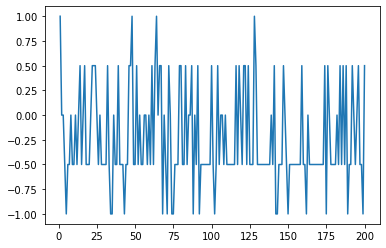

In [11]:
plt.plot(tuple(range(1, 201)), np.ravel(error)[:200])
plt.show()

## 2 Multiclass classification problems

In this exercise, we expand beyond binary classification to cover multiclass problems. A multiclass problem has targets that can take on three or more values. In the credit card dataset, the education variable can take on 6 different values, each corresponding to a different level of education. We will use that as our target in this exercise and will also expand the feature set from 3 to 10 columns.

As in the previous problem, you will define an input layer, dense layers, and an output layer. You will also print the untrained model's predictions, which are probabilities assigned to the classes. 

In [12]:
borrower_features = credit_card_dataset.drop(['default.payment.next.month', 'EDUCATION'], axis=1).to_numpy(dtype=np.float32)
borrower_features.shape

(30000, 22)

In [13]:
# Construct input layer from borrower features
inputs = tf.constant(borrower_features, dtype=tf.float32)

# Define first dense layer
dense1 = Dense(borrower_features.shape[1], activation='sigmoid')(inputs)

# Define second dense layer
dense2 = Dense(16, activation='relu')(dense1)

# Define output layer
outputs = Dense(6, activation='softmax')(dense2)

# Print first five predictions
print(outputs.numpy()[:5])

[[0.2274253  0.06396748 0.11568698 0.2020688  0.2251141  0.16573738]
 [0.206188   0.05461295 0.10914914 0.2284116  0.2664364  0.13520192]
 [0.2274253  0.06396748 0.11568698 0.2020688  0.2251141  0.16573738]
 [0.20645863 0.05584093 0.11454126 0.0690104  0.19804774 0.35610107]
 [0.21732144 0.06289412 0.1236708  0.1434905  0.24740194 0.20522115]]


In [14]:
outputs.numpy().shape

(30000, 6)

In [15]:
tf.reduce_sum(outputs, axis=1).numpy()[:5]

array([1.0000001 , 1.        , 1.0000001 , 1.        , 0.99999994],
      dtype=float32)

Notice that each row of <code>outputs</code> sums to one. This is because a row contains the predicted class probabilities for one example. As with the previous case, our predictions are not yet informative, since we are using an untrained model with randomly initialized parameters. This is why the model tends to assign similar probabilities to each class.

## 3 Optimizers

In [16]:
def loss_function(x):
	return 4.0 * math.cos(x - 1) + (math.cos(2.0 * math.pi * x) / x)

In [17]:
x_1 = tf.Variable(6.0, tf.float32)
x_2 = tf.Variable(0.3, tf.float32)

opt = SGD(learning_rate=0.01)

for j in range(100):
	opt.minimize(lambda: loss_function(x_1), var_list=[x_1])
	opt.minimize(lambda: loss_function(x_2), var_list=[x_2])

print(x_1.numpy(), x_2.numpy())

6.027515 0.25


In [18]:
xs = np.linspace(0.05, 6)
ys = [loss_function(x) for x in xs]

In [19]:
xs_minima = [x_1.numpy(), x_2.numpy()]
ys_minima = [loss_function(x) for x in xs_minima]

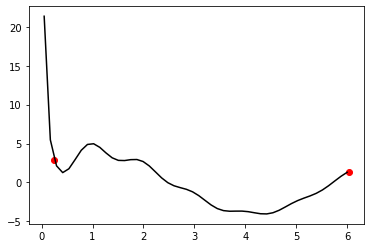

In [20]:
plt.plot(xs, ys, c='k')
plt.scatter(xs_minima, ys_minima, c='r')
plt.show()

In [21]:
opt.get_config()

{'name': 'SGD',
 'learning_rate': 0.01,
 'decay': 0.0,
 'momentum': 0.0,
 'nesterov': False}

The previous problem showed how easy it is to get stuck in local minima. We had a simple optimization problem in one variable and gradient descent still failed to deliver the global minimum when we had to travel through local minima first. One way to avoid this problem is to use **momentum**, which allows the optimizer to break through local minima. We will again use the loss function from the previous problem.

In [22]:
x_1 = tf.Variable(0.05, tf.float32)
x_2 = tf.Variable(0.05, tf.float32)

opt_1 = RMSprop(learning_rate=0.01, momentum=0.99)
opt_2 = RMSprop(learning_rate=0.01, momentum=0.00)

for j in range(100):
	opt_1.minimize(lambda: loss_function(x_1), var_list=[x_1])
	opt_2.minimize(lambda: loss_function(x_2), var_list=[x_2])

print(x_1.numpy(), x_2.numpy())

2.744511 0.24999999


In [23]:
xs_minima = [x_1.numpy(), x_2.numpy()]
ys_minima = [loss_function(x) for x in xs_minima]

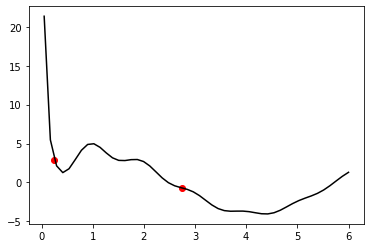

In [24]:
plt.plot(xs, ys, c='k')
plt.scatter(xs_minima, ys_minima, c='r')
plt.show()

Recall that the global minimum is approximately 4.38. Notice that opt_1 built momentum, bringing `x_1` closer to the global minimum. To the contrary, `opt_2`, which had a momentum parameter of 0.0, got stuck in the local minimum on the left.

In [25]:
def model(bias, weights, features=borrower_features):
    product = tf.matmul(features, weights)
    return sigmoid(product + bias)

In [26]:
def loss_function(bias, weights, targets=default, features=borrower_features):
    predictions = model(bias, weights)
    return binary_crossentropy(targets, predictions)

In [27]:
bias = tf.Variable(0.1, dtype=tf.float32)
weights = tf.Variable(np.ones((borrower_features.shape[1], 1)), dtype=tf.float32)

In [28]:
opt = RMSprop(learning_rate=0.01, momentum=0.9)

for j in range(100):
    opt.minimize(lambda: loss_function(bias, weights), var_list=[bias, weights])

print(f"bias: {bias.numpy()}")

bias: 0.10000000149011612


In [29]:
weights.numpy()

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)

## 4. Training a network in TensorFlow

A good initialization can reduce the amount of time needed to find the global minimum.

We often need to initialize hundreds of thousans of variables. Simply using `tf.ones` won't work as it may perform poorly. And selecting initial values individually is tedious and infeasible in many cases. A natural solution to this is to use random or algorithmic generation of initial values. We can, for instance, draw them from a probability distribution, such as the normal or uniform distributions.

There are also specialized options, such as the Glorot initializers, which are designed for ML algorithms.

In the following code, we take a low-level approach to initialize a $500 \times 500$ variable.

In [30]:
weights = tf.Variable(tf.random.normal([500, 500]))
weights

<tf.Variable 'Variable:0' shape=(500, 500) dtype=float32, numpy=
array([[ 1.2595352 , -0.08066779,  0.75502276, ...,  0.35041162,
         1.3745147 , -0.83974934],
       [ 1.1938876 ,  1.1514759 , -0.20934512, ...,  2.4135616 ,
        -0.28389797, -0.8351805 ],
       [-0.64729756, -0.405042  ,  0.4788883 , ..., -0.64323235,
         0.6006321 , -0.7957992 ],
       ...,
       [ 1.1080372 ,  0.84257114,  0.5625267 , ..., -1.274321  ,
         2.8081906 , -0.18675981],
       [-0.6149104 ,  0.19276585, -1.3200909 , ...,  0.68337333,
         2.1131139 ,  1.0695388 ],
       [-1.2745756 , -0.7665667 , -1.852993  , ..., -0.41475508,
         0.90817237, -1.2746031 ]], dtype=float32)>

Alternatively, we can also use the truncated random normal distribution, which discards very large and very small draws.

In [31]:
weigths = tf.Variable(tf.random.truncated_normal([500, 500]))
weights

<tf.Variable 'Variable:0' shape=(500, 500) dtype=float32, numpy=
array([[ 1.2595352 , -0.08066779,  0.75502276, ...,  0.35041162,
         1.3745147 , -0.83974934],
       [ 1.1938876 ,  1.1514759 , -0.20934512, ...,  2.4135616 ,
        -0.28389797, -0.8351805 ],
       [-0.64729756, -0.405042  ,  0.4788883 , ..., -0.64323235,
         0.6006321 , -0.7957992 ],
       ...,
       [ 1.1080372 ,  0.84257114,  0.5625267 , ..., -1.274321  ,
         2.8081906 , -0.18675981],
       [-0.6149104 ,  0.19276585, -1.3200909 , ...,  0.68337333,
         2.1131139 ,  1.0695388 ],
       [-1.2745756 , -0.7665667 , -1.852993  , ..., -0.41475508,
         0.90817237, -1.2746031 ]], dtype=float32)>

We can also use a high-level approach.

The default initializer is `tf.keras.initializers.glorot_uniform` which we can explicitly specify as `kernel_initializer='glorot_uniform'`.

In [32]:
# Dense layer with default initializer
dense = Dense(32, activation='relu')

# Dense layer with zeros initializer
dense = Dense(32, activation='relu', kernel_initializer='zeros')

Overfitting is another issue we'll encounter when training neural networks. A model overfits when it simply memorized examples, rather than learning the underlying patterns of the data. Overfitting is especially problematic for neural networks, which contain many parameters and are quite good at memorization.

A simple solution to the overfitting problem is to use **dropout**, an operation that will randomly drop the weights connected to certain nodes in a layer during the training process. This will force our network to develop more robust rules for classification, since it cannot rely on any particular nodes being passed to an activation function. Hence, this will tend to improve out-of-sample performance.

In [33]:
# inputs = np.array(borrower_features, np.float32)
# dense1 = Dense(32, activation='relu')(inputs)
# dense2 = Dense(16, activation='relu')(dense1)
# dropout1 = Dropout(0.25)(dense2)  # Drops the weights connected to 25% of nodes randomly
# outpus = Dense(1, activation='sigmoid')(dropout1)

In [34]:
# Define the layer 1 weights
w1 = tf.Variable(tf.random.normal([23, 7]))

# Initialize the layer 1 bias
b1 = tf.Variable(tf.ones([7]))

# Define the layer 2 weights
w2 = tf.Variable(tf.random.normal([7, 1]))

# Define the layer 2 bias
b2 = tf.Variable(0.0)

In [35]:
borrower_features_train = credit_card_dataset.iloc[:3_000, :].drop('default.payment.next.month', axis=1).to_numpy(dtype=np.float32)
borrower_features_train.shape

(3000, 23)

In [36]:
default_train = credit_card_dataset.loc[:3000, 'default.payment.next.month'].to_numpy(dtype=np.float32)
default_train.shape

(3000,)

In [37]:
def model(w1, b1, w2, b2, features=borrower_features_train):
	layer1 = relu(tf.matmul(features, w1) + b1)
	dropout = Dropout(0.25)(layer1)
	return sigmoid(tf.matmul(dropout, w2) + b2)


def loss_function(w1, b1, w2, b2, features=borrower_features_train, targets=default_train):
	predictions = model(w1, b1, w2, b2)
	return binary_crossentropy(targets, predictions)

In [38]:
test_features = credit_card_dataset.iloc[3_000:3_500, :].drop('default.payment.next.month', axis=1).to_numpy(dtype=np.float32)
test_features.shape

(500, 23)

In [39]:
test_targets = credit_card_dataset.loc[3_001:3_500, 'default.payment.next.month'].to_numpy(dtype=np.float32)
test_targets = test_targets.reshape(-1, 1)
test_targets.shape

(500, 1)

In [40]:
# Train the model
for j in range(100):
    # Complete the optimizer
	opt.minimize(lambda: loss_function(w1, b1, w2, b2),
                 var_list=[w1, b1, w2, b2])

# Make predictions with model
model_predictions = model(w1, b1, w2, b2, test_features)

In [41]:
model_predictions.numpy().shape

(500, 1)

In [42]:
def confusion_matrix(default, model_predictions):
	df = pd.DataFrame(np.hstack([default, model_predictions.numpy() > 0.5]), columns = ['Actual','Predicted'])
	confusion_matrix = pd.crosstab(df['Actual'], df['Predicted'], rownames=['Actual'], colnames=['Predicted'])
	heatmap(confusion_matrix, cmap="Greys", fmt="d", annot=True, cbar=False)
	plt.show()

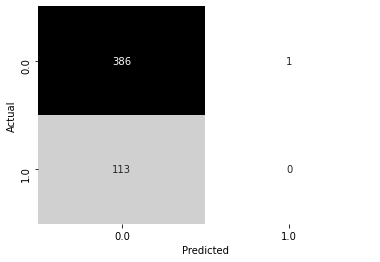

In [43]:
confusion_matrix(test_targets, model_predictions)

The diagram shown is called a "confusion matrix". The diagonal elements show the number of correct predictions. The off-diagonal elements show the number of incorrect predictions. We can see that the model performs reasonably-well, but does so by overpredicting non-default. This suggests that we may need to train longer, tune the model's hyperparameters, or change the model's architecture.